In [1]:

import os
os.getcwd()

'C:\\Users\\polepasy\\ml'

In [2]:
#Step 1: Import Libraries
import pandas as pd

#Step 2: Load Dataset
df = pd.read_csv("Global YouTube Statistics.csv", encoding='ISO-8859-1')
df.columns = df.columns.str.strip()  # Clean column names


In [3]:
print("\n🔍 Dataset Overview:")
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())
print("\nSample Data:\n", df.head())

# Check for non-numeric entries in numeric columns
print("\nChecking for numeric-like columns with invalid entries:")
numeric_check_columns = ['subscribers', 'uploads', 'video views',
                         'lowest_yearly_earnings', 'highest_yearly_earnings']
for col in numeric_check_columns:
    non_numeric = df[~df[col].astype(str).str.replace(',', '', regex=False)
                     .str.replace('$', '', regex=False).str.strip().str.replace('.', '', regex=False).str.isnumeric()]
    print(f"{col}: {non_numeric.shape[0]} non-numeric rows")


🔍 Dataset Overview:
Shape: (995, 28)

Data Types:
 rank                                         int64
Youtuber                                    object
subscribers                                  int64
video views                                float64
category                                    object
Title                                       object
uploads                                      int64
Country                                     object
Abbreviation                                object
channel_type                                object
video_views_rank                           float64
country_rank                               float64
channel_type_rank                          float64
video_views_for_the_last_30_days           float64
lowest_monthly_earnings                    float64
highest_monthly_earnings                   float64
lowest_yearly_earnings                     float64
highest_yearly_earnings                    float64
subscribers_for_last_30_days  

In [4]:
currency_columns = ['lowest_yearly_earnings', 'highest_yearly_earnings']
for col in currency_columns:
    df[col] = (df[col]
               .astype(str)
               .str.replace('$', '', regex=False)
               .str.replace(',', '', regex=False)
               .str.strip()
               .replace({'N/A': None, '-': None}))
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [5]:
numeric_columns = ['subscribers', 'uploads', 'video views']
for col in numeric_columns:
    df[col] = (df[col]
               .astype(str)
               .str.replace(',', '', regex=False)
               .str.strip()
               .replace({'N/A': None, '-': None}))
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [6]:
df.dropna(subset=['highest_yearly_earnings', 'lowest_yearly_earnings'] + numeric_columns, inplace=True)

In [7]:
other_columns = ['video_views_rank', 'country_rank', 'channel_type_rank', 'video_views_for_the_last_30_days', 'lowest_monthly_earnings', 'highest_monthly_earnings', 'subscribers_for_last_30_days', 'Gross tertiary education enrollment (%)', 'Population', 'Unemployment rate', 'Urban_population']

In [8]:
categorical_columns = ['category', 'channel_type', 'Country']
all_columns = numeric_columns + categorical_columns + currency_columns+other_columns
df_model = df[all_columns].copy()

In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
 
# Separate numeric and categorical columns
numerical_columns = numeric_columns + currency_columns + other_columns
categorical_columns = ['category', 'channel_type', 'Country']
 
# Define preprocessing pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
 
preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), numerical_columns),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_columns)
])
 
# Fit-transform the full feature set
X_transformed = preprocessor.fit_transform(df_model)
 
print("✅ Data has been successfully encoded and scaled.")

✅ Data has been successfully encoded and scaled.


In [10]:
#df_model = pd.get_dummies(df_model, columns=categorical_columns, drop_first=True)

In [11]:
X = df_model.drop(['highest_yearly_earnings', 'lowest_yearly_earnings'], axis=1)
y = df_model['lowest_yearly_earnings']  # or switch to lowest_yearly_earnings

In [12]:
print("\nData validation + cleaning complete.")
print("X shape:", X.shape)
print("y shape:", y.shape)
print("\nFeature sample:\n", X.head())


Data validation + cleaning complete.
X shape: (995, 17)
y shape: (995,)

Feature sample:
    subscribers  uploads   video views          category   channel_type  \
0    245000000    20082  2.280000e+11             Music          Music   
1    170000000        1  0.000000e+00  Film & Animation          Games   
2    166000000      741  2.836884e+10     Entertainment  Entertainment   
3    162000000      966  1.640000e+11         Education      Education   
4    159000000   116536  1.480000e+11             Shows  Entertainment   

         Country  video_views_rank  country_rank  channel_type_rank  \
0          India               1.0           1.0                1.0   
1  United States         4055159.0        7670.0             7423.0   
2  United States              48.0           1.0                1.0   
3  United States               2.0           2.0                1.0   
4          India               3.0           2.0                2.0   

   video_views_for_the_last_30_days  

In [13]:
print(df_model.columns.tolist())

['subscribers', 'uploads', 'video views', 'category', 'channel_type', 'Country', 'lowest_yearly_earnings', 'highest_yearly_earnings', 'video_views_rank', 'country_rank', 'channel_type_rank', 'video_views_for_the_last_30_days', 'lowest_monthly_earnings', 'highest_monthly_earnings', 'subscribers_for_last_30_days', 'Gross tertiary education enrollment (%)', 'Population', 'Unemployment rate', 'Urban_population']


In [14]:
missing_cols = [col for col in all_columns if col not in df_model.columns]
print("Missing columns:", missing_cols)
print("Available columns:", df_model.columns.tolist())

Missing columns: []
Available columns: ['subscribers', 'uploads', 'video views', 'category', 'channel_type', 'Country', 'lowest_yearly_earnings', 'highest_yearly_earnings', 'video_views_rank', 'country_rank', 'channel_type_rank', 'video_views_for_the_last_30_days', 'lowest_monthly_earnings', 'highest_monthly_earnings', 'subscribers_for_last_30_days', 'Gross tertiary education enrollment (%)', 'Population', 'Unemployment rate', 'Urban_population']


In [15]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor
import time

# Load the dataset
data = df_model  # Ensure df_model is defined

# Verify column names to prevent KeyError
print("Available columns in df_model:", data.columns.tolist())

# Select features
features = ['subscribers', 'video views', 'uploads', 'video_views_rank', 'country_rank', 
            'channel_type_rank', 'video_views_for_the_last_30_days', 'subscribers_for_last_30_days', 
            'Gross tertiary education enrollment (%)', 'Population', 'Unemployment rate', 
            'Urban_population', 'category', 'Country', 'channel_type']

# Check for missing columns
missing_cols = [col for col in features if col not in data.columns]
if missing_cols:
    raise KeyError(f"Missing columns: {missing_cols}")

X = data[features]
y = data['lowest_yearly_earnings']

# Handle categorical and numerical features
numerical_features = ['subscribers', 'video views', 'uploads', 'video_views_rank', 'country_rank', 
                      'channel_type_rank', 'video_views_for_the_last_30_days', 'subscribers_for_last_30_days', 
                      'Gross tertiary education enrollment (%)', 'Population', 'Unemployment rate', 
                      'Urban_population']
categorical_features = ['category', 'Country', 'channel_type']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

# Define models
rf_modelv1 = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

xgb_modelv1 = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42))
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define MAPE function
def mean_absolute_percentage_error(y_true, y_pred):
    """
    Calculate Mean Absolute Percentage Error (MAPE).
    Returns MAPE as a percentage.
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0  # Avoid division by zero
    if not np.any(non_zero_mask):
        return np.nan  # Return NaN if all values are zero
    y_true, y_pred = y_true[non_zero_mask], y_pred[non_zero_mask]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to evaluate and print results
def evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    print(f"\n{model_name} Results:")
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")
    print(f"Training Time: {train_time:.2f} seconds")
    
    # Feature importance
    feature_names = numerical_features + model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features).tolist()
    importances = model.named_steps['regressor'].feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
    
    print(f"\nTop 5 Feature Importances for {model_name}:")
    print(feature_importance_df.head(5))
    
    return r2, mse, mape, train_time

# Evaluate Random Forest
rf_r2, rf_mse, rf_mape, rf_time = evaluate_model(rf_modelv1, "Random Forest", X_train, X_test, y_train, y_test)

# Evaluate XGBoost
xgb_r2, xgb_mse, xgb_mape, xgb_time = evaluate_model(xgb_modelv1, "XGBoost", X_train, X_test, y_train, y_test)

# Compare models
print("\nModel Comparison:")
print(f"Random Forest R²: {rf_r2:.4f}, MSE: {rf_mse:.4f}, MAPE: {rf_mape:.4f}%, Training Time: {rf_time:.2f}s")
print(f"XGBoost R²: {xgb_r2:.4f}, MSE: {xgb_mse:.4f}, MAPE: {xgb_mape:.4f}%, Training Time: {xgb_time:.2f}s")
if rf_r2 > xgb_r2:
    print("Random Forest performs better based on R² score.")
else:
    print("XGBoost performs better based on R² score.")

Available columns in df_model: ['subscribers', 'uploads', 'video views', 'category', 'channel_type', 'Country', 'lowest_yearly_earnings', 'highest_yearly_earnings', 'video_views_rank', 'country_rank', 'channel_type_rank', 'video_views_for_the_last_30_days', 'lowest_monthly_earnings', 'highest_monthly_earnings', 'subscribers_for_last_30_days', 'Gross tertiary education enrollment (%)', 'Population', 'Unemployment rate', 'Urban_population']

Random Forest Results:
R² Score: 0.9013
Mean Squared Error: 60030221137.4831
Mean Absolute Percentage Error (MAPE): 1003.9749%
Training Time: 1.61 seconds

Top 5 Feature Importances for Random Forest:
                                   Feature  Importance
6         video_views_for_the_last_30_days    0.853812
7             subscribers_for_last_30_days    0.036084
3                         video_views_rank    0.026261
1                              video views    0.021020
8  Gross tertiary education enrollment (%)    0.017602

XGBoost Results:
R² Scor

Available columns in df_model: ['subscribers', 'uploads', 'video views', 'category', 'channel_type', 'Country', 'lowest_yearly_earnings', 'highest_yearly_earnings', 'video_views_rank', 'country_rank', 'channel_type_rank', 'video_views_for_the_last_30_days', 'lowest_monthly_earnings', 'highest_monthly_earnings', 'subscribers_for_last_30_days', 'Gross tertiary education enrollment (%)', 'Population', 'Unemployment rate', 'Urban_population']

Running Grid Search for Random Forest...

Running Grid Search for XGBoost...

Best Random Forest Parameters: {'regressor__max_depth': None, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 100}
Best Random Forest CV R²: 0.8361842345831066

Best XGBoost Parameters: {'regressor__colsample_bytree': 0.8, 'regressor__learning_rate': 0.05, 'regressor__max_depth': 6, 'regressor__n_estimators': 100, 'regressor__subsample': 0.8}
Best XGBoost CV R²: 0.7897218190951614

Best Random Forest Results:
R² Score: 0.9071


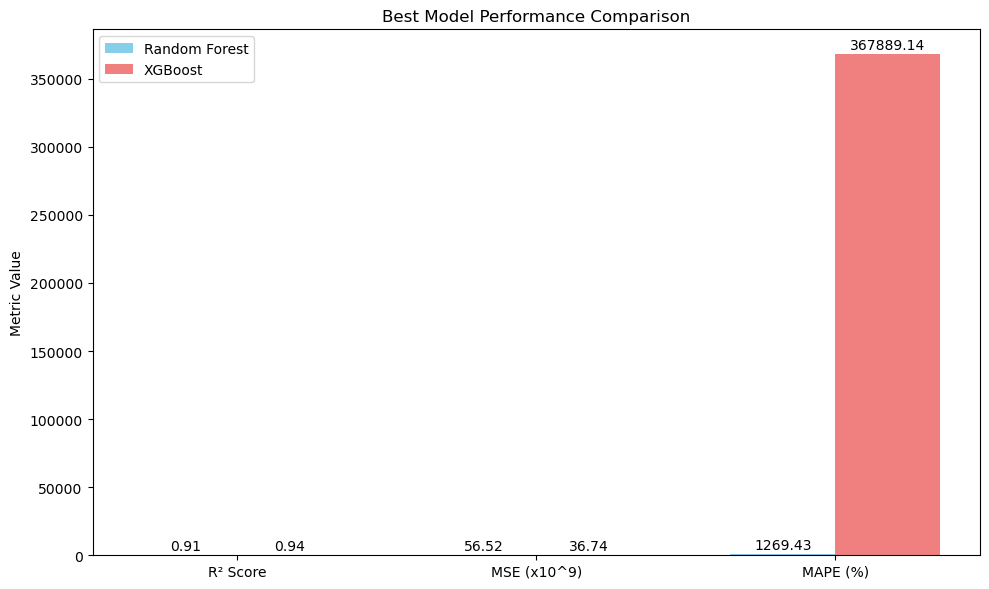

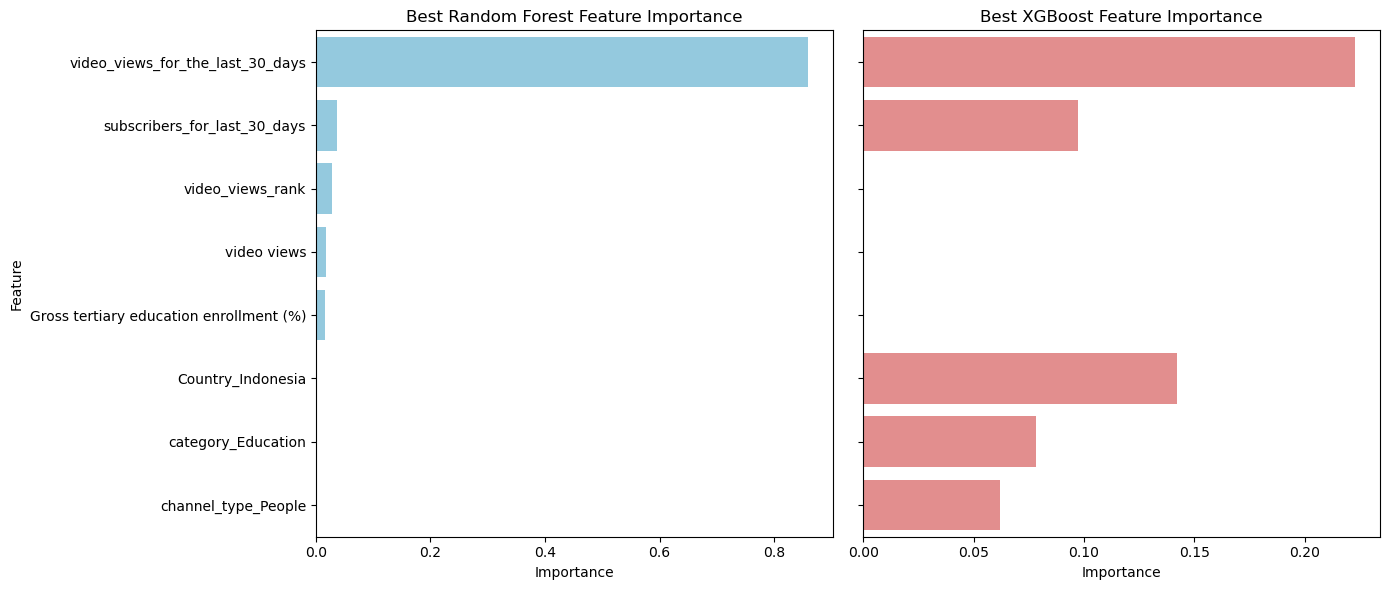

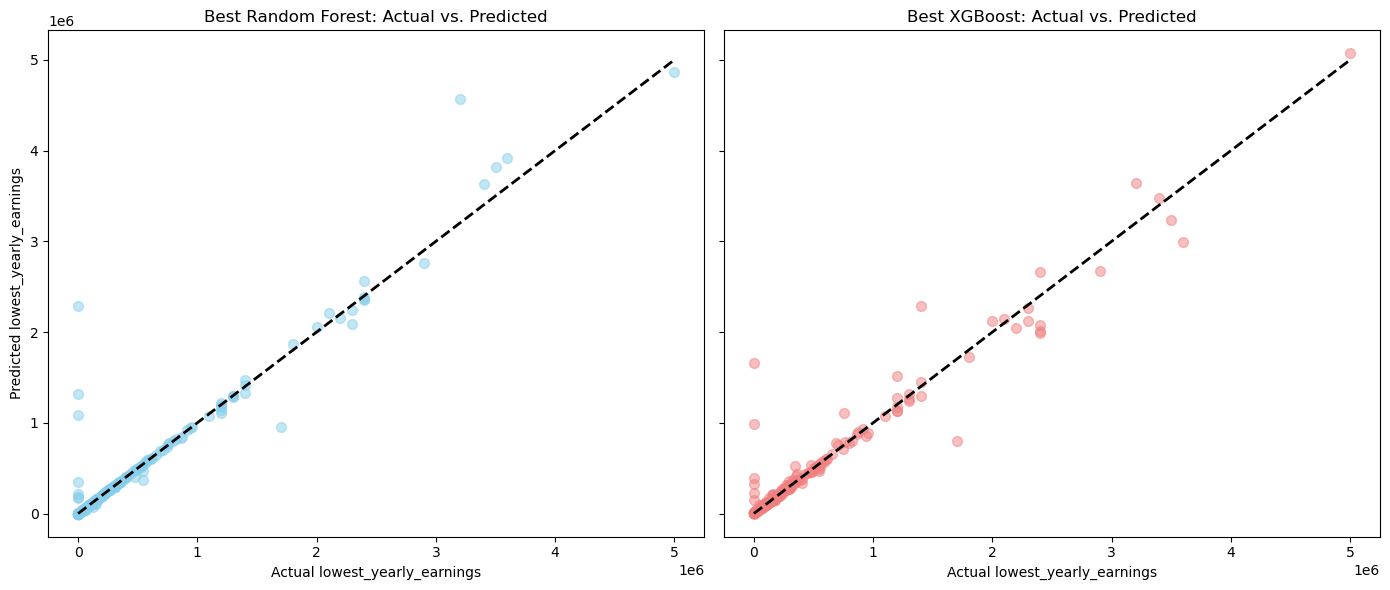


Model Comparison:
Best Random Forest R²: 0.9071, MSE: 56523272759.8286, MAPE: 1269.4289%, Training Time: 1.37s
Best XGBoost R²: 0.9396, MSE: 36738438447.1203, MAPE: 367889.1362%, Training Time: 0.08s
Best XGBoost performs better based on R² score.


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor
import time

# Load the dataset
data = df_model  # Ensure df_model is defined

# Verify column names to prevent KeyError
print("Available columns in df_model:", data.columns.tolist())

# Select features
features = ['subscribers', 'video views', 'uploads', 'video_views_rank', 'country_rank', 
            'channel_type_rank', 'video_views_for_the_last_30_days', 'subscribers_for_last_30_days', 
            'Gross tertiary education enrollment (%)', 'Population', 'Unemployment rate', 
            'Urban_population', 'category', 'Country', 'channel_type']

# Check for missing columns
missing_cols = [col for col in features if col not in data.columns]
if missing_cols:
    raise KeyError(f"Missing columns: {missing_cols}")

X = data[features]
y = data['lowest_yearly_earnings']

# Handle categorical and numerical features
numerical_features = ['subscribers', 'video views', 'uploads', 'video_views_rank', 'country_rank', 
                      'channel_type_rank', 'video_views_for_the_last_30_days', 'subscribers_for_last_30_days', 
                      'Gross tertiary education enrollment (%)', 'Population', 'Unemployment rate', 
                      'Urban_population']
categorical_features = ['category', 'Country', 'channel_type']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

# Define parameter grids
rf_param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [10, 20, None],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2]
}

xgb_param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.05, 0.1],
    'regressor__max_depth': [3, 6, 9],
    'regressor__subsample': [0.8, 1.0],
    'regressor__colsample_bytree': [0.8, 1.0]
}

# Define models
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42))
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define MAPE function
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    if not np.any(non_zero_mask):
        return np.nan
    y_true, y_pred = y_true[non_zero_mask], y_pred[non_zero_mask]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to evaluate and print results
def evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    print(f"\n{model_name} Results:")
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")
    print(f"Training Time: {train_time:.2f} seconds")
    
    # Feature importance
    feature_names = numerical_features + model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features).tolist()
    importances = model.named_steps['regressor'].feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
    
    print(f"\nTop 5 Feature Importances for {model_name}:")
    print(feature_importance_df.head(5))
    
    return r2, mse, mape, train_time, y_pred, feature_importance_df

# Perform Grid Search
print("\nRunning Grid Search for Random Forest...")
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='r2', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

print("\nRunning Grid Search for XGBoost...")
xgb_grid_search = GridSearchCV(xgb_pipeline, xgb_param_grid, cv=5, scoring='r2', n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)

# Get best models
best_rf_model = rf_grid_search.best_estimator_
best_xgb_model = xgb_grid_search.best_estimator_

# Print best parameters
print("\nBest Random Forest Parameters:", rf_grid_search.best_params_)
print("Best Random Forest CV R²:", rf_grid_search.best_score_)
print("\nBest XGBoost Parameters:", xgb_grid_search.best_params_)
print("Best XGBoost CV R²:", xgb_grid_search.best_score_)

# Evaluate best models
rf_r2, rf_mse, rf_mape, rf_time, rf_y_pred, rf_feature_importance = evaluate_model(best_rf_model, "Best Random Forest", X_train, X_test, y_train, y_test)
xgb_r2, xgb_mse, xgb_mape, xgb_time, xgb_y_pred, xgb_feature_importance = evaluate_model(best_xgb_model, "Best XGBoost", X_train, X_test, y_train, y_test)

# Plotting functions
def plot_metrics(rf_metrics, xgb_metrics):
    metrics = ['R² Score', 'MSE', 'MAPE']
    rf_values = [rf_metrics[0], rf_metrics[1] / 1e9, rf_metrics[2]]
    xgb_values = [xgb_metrics[0], xgb_metrics[1] / 1e9, xgb_metrics[2]]
    
    x = np.arange(len(metrics))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(x - width/2, rf_values, width, label='Random Forest', color='skyblue')
    ax.bar(x + width/2, xgb_values, width, label='XGBoost', color='lightcoral')
    
    ax.set_ylabel('Metric Value')
    ax.set_title('Best Model Performance Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(['R² Score', 'MSE (x10^9)', 'MAPE (%)'])
    ax.legend()
    
    for i, v in enumerate(rf_values):
        ax.text(i - width/2, v + 0.01 * max(rf_values + xgb_values), f"{v:.2f}", ha='center')
    for i, v in enumerate(xgb_values):
        ax.text(i + width/2, v + 0.01 * max(rf_values + xgb_values), f"{v:.2f}", ha='center')
    
    plt.tight_layout()
    plt.show()

def plot_feature_importance(rf_importance, xgb_importance, n_top=5):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
    
    rf_top = rf_importance.head(n_top)
    sns.barplot(x='Importance', y='Feature', data=rf_top, ax=ax1, color='skyblue')
    ax1.set_title('Best Random Forest Feature Importance')
    ax1.set_xlabel('Importance')
    
    xgb_top = xgb_importance.head(n_top)
    sns.barplot(x='Importance', y='Feature', data=xgb_top, ax=ax2, color='lightcoral')
    ax2.set_title('Best XGBoost Feature Importance')
    ax2.set_xlabel('Importance')
    
    plt.tight_layout()
    plt.show()

def plot_actual_vs_predicted(y_test, rf_y_pred, xgb_y_pred):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
    
    ax1.scatter(y_test, rf_y_pred, alpha=0.5, color='skyblue', s=50)
    ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    ax1.set_title('Best Random Forest: Actual vs. Predicted')
    ax1.set_xlabel('Actual lowest_yearly_earnings')
    ax1.set_ylabel('Predicted lowest_yearly_earnings')
    
    ax2.scatter(y_test, xgb_y_pred, alpha=0.5, color='lightcoral', s=50)
    ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    ax2.set_title('Best XGBoost: Actual vs. Predicted')
    ax2.set_xlabel('Actual lowest_yearly_earnings')
    
    plt.tight_layout()
    plt.show()

# Plot results
plot_metrics([rf_r2, rf_mse, rf_mape], [xgb_r2, xgb_mse, xgb_mape])
plot_feature_importance(rf_feature_importance, xgb_feature_importance)
plot_actual_vs_predicted(y_test, rf_y_pred, xgb_y_pred)

# Compare models
print("\nModel Comparison:")
print(f"Best Random Forest R²: {rf_r2:.4f}, MSE: {rf_mse:.4f}, MAPE: {rf_mape:.4f}%, Training Time: {rf_time:.2f}s")
print(f"Best XGBoost R²: {xgb_r2:.4f}, MSE: {xgb_mse:.4f}, MAPE: {xgb_mape:.4f}%, Training Time: {xgb_time:.2f}s")
if rf_r2 > xgb_r2:
    print("Best Random Forest performs better based on R² score.")
else:
    print("Best XGBoost performs better based on R² score.")

In [18]:
import joblib

# choose the best pipeline
if rf_r2 > xgb_r2:
    best_pipeline = best_rf_model
else:
    best_pipeline = best_xgb_model

# serialize!
joblib.dump(best_pipeline, "model_pipeline.pkl")

['model_pipeline.pkl']

In [19]:
import os
os.getcwd()




'C:\\Users\\polepasy\\ml'

In [20]:
import joblib
joblib.dump(model, "model_pipeline.pkl")  # This creates model.pkl in the same folder


NameError: name 'model' is not defined

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import joblib

# Features
X = df[['subscribers', 'uploads', 'video views']]

# Create a fake target for demo purposes
# (In real case, replace this with your real target column)
y = (df['video views'] / 1e9) + (df['uploads'] * 0.1) - (df['subscribers'] / 1e6)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Save model
joblib.dump(model, "model.pkl")
print("✅ Model trained and saved as model.pkl")


✅ Model trained and saved as model.pkl


In [22]:
code = '''
import streamlit as st
import pandas as pd
import joblib

# Load trained model
model = joblib.load("model.pkl")

st.title("📉 Financial Loss Prediction for YouTube Channels")

st.markdown("Enter stats below to predict estimated financial loss:")

subscribers = st.number_input("Subscribers", min_value=0)
uploads = st.number_input("Uploads", min_value=0)
video_views = st.number_input("Video Views", min_value=0)

if st.button("Predict"):
    input_df = pd.DataFrame([[subscribers, uploads, video_views]],
                            columns=["subscribers", "uploads", "video views"])
    prediction = model.predict(input_df)
    st.success(f"💸 Predicted Financial Loss: ${prediction[0]:,.2f} Million")
'''

with open("app4.py", "w", encoding="utf-8") as f:
    f.write(code)

print("✅ app4.py created!")


✅ app4.py created!
